In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-80.csv")

In [ ]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### is there any Null values ?

In [ ]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Is there any multi-collinearity ?

In [ ]:
churn_df.corr()

<ipython-input-5-7bfade7896bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_df.corr()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


<ipython-input-6-f8c08a2746c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_df.corr(), annot = True, cmap = 'RdYlGn')


<Axes: >

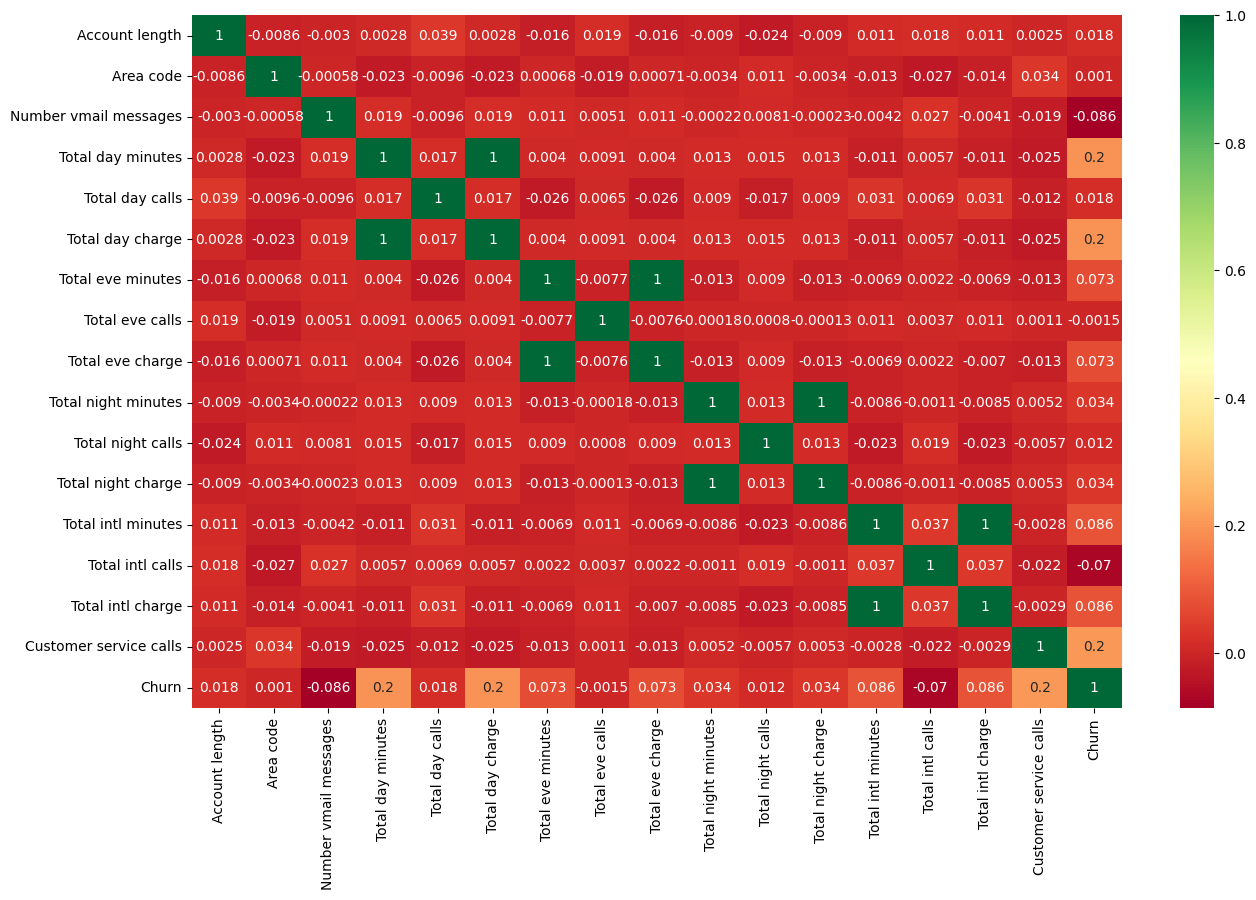

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(churn_df.corr(), annot = True, cmap = 'RdYlGn')

##### Are the labels/class Imbalanced ?

<Axes: xlabel='Churn', ylabel='count'>

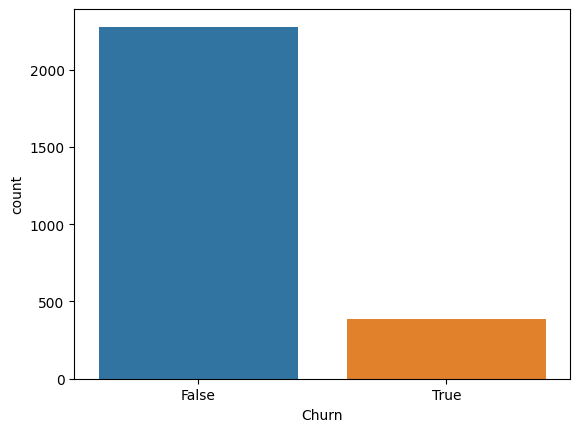

In [ ]:
sns.countplot(x = 'Churn', data = churn_df)

In [ ]:
churn_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [ ]:
# Filter data for class 0 & 1 & create new DF
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [ ]:
# To handle imbalanced class : upsample the class which is lower in count
from sklearn.utils import resample
df_1_upsample = resample(df_1, n_samples = 1388, replace = True, random_state = 123)

In [ ]:
churn_df1 = pd.concat([df_0, df_1_upsample])

In [ ]:
churn_df1['Churn'].value_counts()

False    2278
True     1388
Name: Churn, dtype: int64

In [ ]:
churn_df1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NV,69,510,Yes,Yes,33,271.5,98,46.16,253.4,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True
2233,ME,62,415,Yes,Yes,32,218.4,93,37.13,236.7,132,20.12,192.2,137,8.65,13.2,3,3.56,0,True
455,NC,133,408,Yes,Yes,32,221.1,137,37.59,264.9,99,22.52,168.9,108,7.60,15.4,4,4.16,2,True
120,VT,117,408,Yes,No,0,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_encoder = LabelEncoder()
le_encoder.fit(churn_df1['International plan'])

LabelEncoder()

In [ ]:
churn_df1['International plan'] = le_encoder.transform(churn_df1['International plan'])

In [ ]:
le_encoder.fit(churn_df1['Voice mail plan'])
churn_df1['Voice mail plan'] = le_encoder.transform(churn_df1['Voice mail plan'])

In [ ]:
churn_df1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NV,69,510,1,1,33,271.5,98,46.16,253.4,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True
2233,ME,62,415,1,1,32,218.4,93,37.13,236.7,132,20.12,192.2,137,8.65,13.2,3,3.56,0,True
455,NC,133,408,1,1,32,221.1,137,37.59,264.9,99,22.52,168.9,108,7.60,15.4,4,4.16,2,True
120,VT,117,408,1,0,0,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True


##### Features & Target

<ipython-input-19-324fbbab5f22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_df1.corr(), annot = True, cmap = 'RdYlGn')


<Axes: >

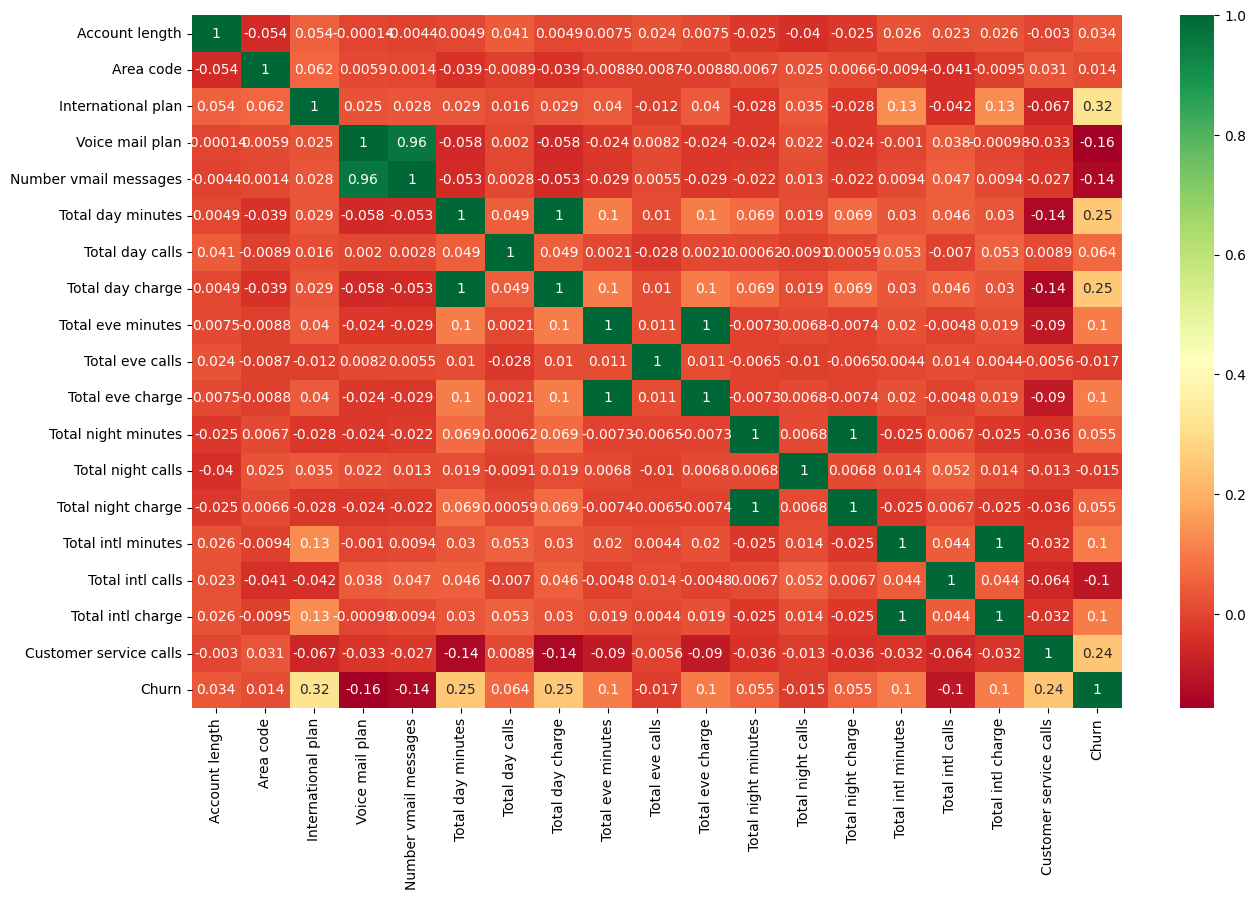

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(churn_df1.corr(), annot = True, cmap = 'RdYlGn')

In [ ]:
churn_df1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
X = churn_df1.drop(['State','Number vmail messages','Total day charge','Total eve charge',
                    'Total night charge', 'Total intl charge','Churn'], axis = 1)
Y = churn_df1['Churn']

In [ ]:
X.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

##### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Hyperparameters : The are the parameters that increase the model performances, these Hyperparameters are having
# default values which need to be updated to increase perfomance of model
# e.g. criterion = 'entropy' or 'gini', max_depth: maximum depth of tree (done to avoid overfitting)
tree_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)

In [ ]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [ ]:
tree_clf.score(x_test,y_test)

0.9564032697547684

In [ ]:
tree_clf.get_depth()   # get_depth() function returns depth of decision tree

15

##### Classification Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# yhat
prediction = tree_clf.predict(x_test)

In [ ]:
confusion_matrix(y_test, prediction)

array([[429,  18],
       [ 14, 273]])

<Axes: >

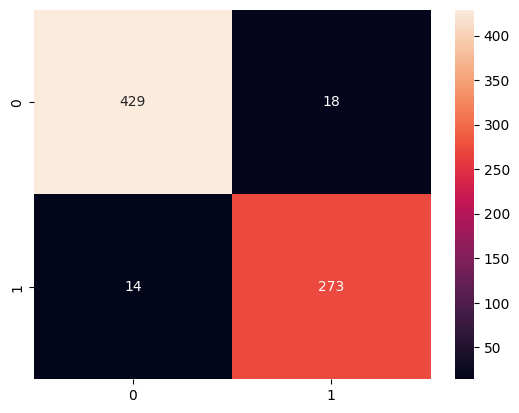

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.97      0.96      0.96       447
        True       0.94      0.95      0.94       287

    accuracy                           0.96       734
   macro avg       0.95      0.96      0.95       734
weighted avg       0.96      0.96      0.96       734



##### Plot Tree

In [ ]:
import graphviz
from sklearn import tree

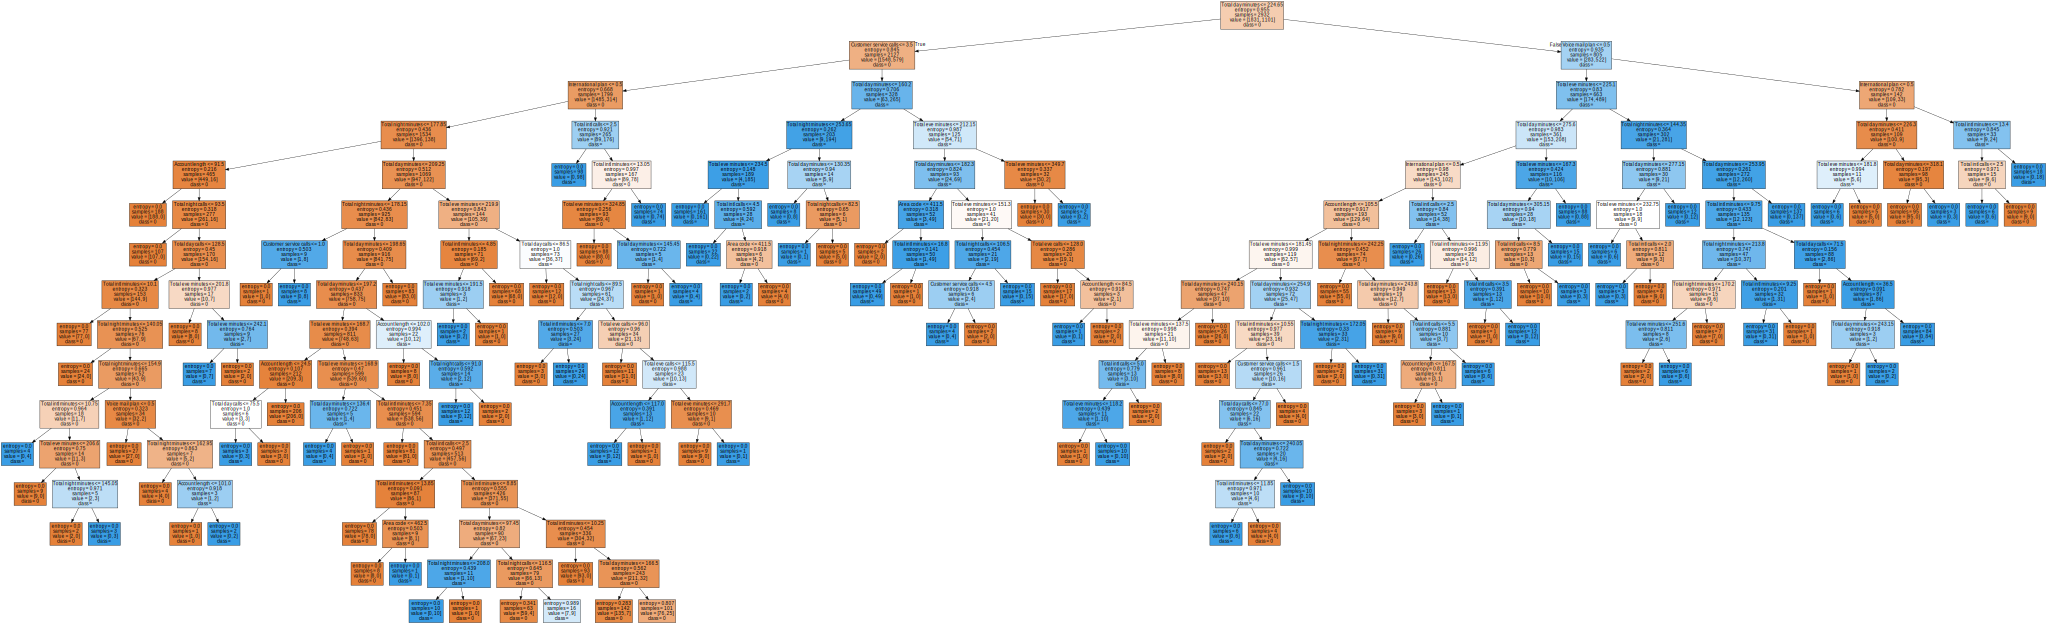

<Figure size 2500x2000 with 0 Axes>

In [ ]:
# DOT data
fig = plt.figure(figsize=(25,20))
dot_data = tree.export_graphviz(tree_clf,
                                feature_names=X.columns,
                                class_names=str(Y),
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(bootstrap=True,
                       n_estimators = 30, criterion = 'entropy', max_depth = 8, max_features=6)

In [ ]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=6,
                       n_estimators=30)

In [ ]:
rf_clf.score(x_test, y_test)

0.9482288828337875

In [ ]:
# yhat
prediction = rf_clf.predict(x_test)

<Axes: >

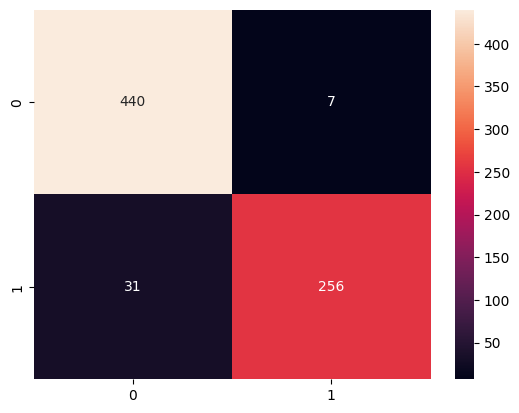

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.93      0.98      0.96       447
        True       0.97      0.89      0.93       287

    accuracy                           0.95       734
   macro avg       0.95      0.94      0.94       734
weighted avg       0.95      0.95      0.95       734

